In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None) # Setting this to none so all columns are displayed

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv(r"C:\Users\harma\Downloads\startup_data.csv")
start_up = df

In [4]:
# Checks if we have columns with null values and splits them into those having categorical values and numeric values

def check_for_null_values(df):
    total_columns_with_null_values = dict(df.isnull().sum()[df.isnull().sum() > 0])
    if len(total_columns_with_null_values) > 0:
#         list_of_columns_with_null_values = list(dict(df.isnull().sum()[df.isnull().sum() > 0]))
        categorical_columns_with_null_values = {i : df[i].isnull().sum() for i in list(df.select_dtypes('object'))}
        numeric_columns_with_null_values = {i : df[i].isnull().sum() for i in list(df.select_dtypes(np.number))}
        print("The categorical null values are: \n\n{}\n\nThe numeric null values are: \n\n{}\n\n".format(categorical_columns_with_null_values, numeric_columns_with_null_values))
    else:
        print("The dataset has no null values")

check_for_null_values(df)

The dataset has no null values


In [5]:
# Used for converting the categorical variable (State) into numeric form so that we can feed it to the model

label_encoder = LabelEncoder()

def Encoding(df):
    columns_with_categorical_values = list(df.select_dtypes('object'))
    for column in columns_with_categorical_values:
        df[column] = label_encoder.fit_transform(df[column])
    display(df)

Encoding(df)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [6]:
# Splitting the dataset into training and testing data (using Random Sampling)

def Sampling(df, target_variable):
    global Train, Test, Train_X, Test_X, Train_Y, Test_Y
    Train, Test = train_test_split(df, test_size = 0.2, random_state = None)
    Train_X = Train.drop(columns = [target_variable])
    Train_Y = Train[target_variable].reset_index(drop = True)
    Test_X = Test.drop(columns = [target_variable])
    Test_Y = Test[target_variable].reset_index(drop = True)
    
    print ("The shapes of sampled datasets are (after standard sampling ratio = 0.2 test size ) : \n")
    print ("Train Data = {}\n\nTest Data = {}\n\nTrain_X Data = {}\n\nTrain_Y Data = {}\n\nTest_X Data = {}\n\nTest_Y Data = {}".format(Train.shape , Test.shape , Train_X.shape , Train_Y.shape , Test_X.shape , Test_Y.shape))

Sampling(df,'Profit')

The shapes of sampled datasets are (after standard sampling ratio = 0.2 test size ) : 

Train Data = (40, 5)

Test Data = (10, 5)

Train_X Data = (40, 4)

Train_Y Data = (40,)

Test_X Data = (10, 4)

Test_Y Data = (10,)


In [7]:
parameters = {'fit_intercept' : [True, False], 'copy_X' : [True, False]}

linear_regressor = LinearRegression()

grid_search = GridSearchCV(linear_regressor, parameters)
grid_search.fit(Train_X, Train_Y)

print('Best hyperparameters: ', grid_search.best_params_)

Best hyperparameters:  {'copy_X': True, 'fit_intercept': True}


<Axes: xlabel='R&D Spend', ylabel='Count'>

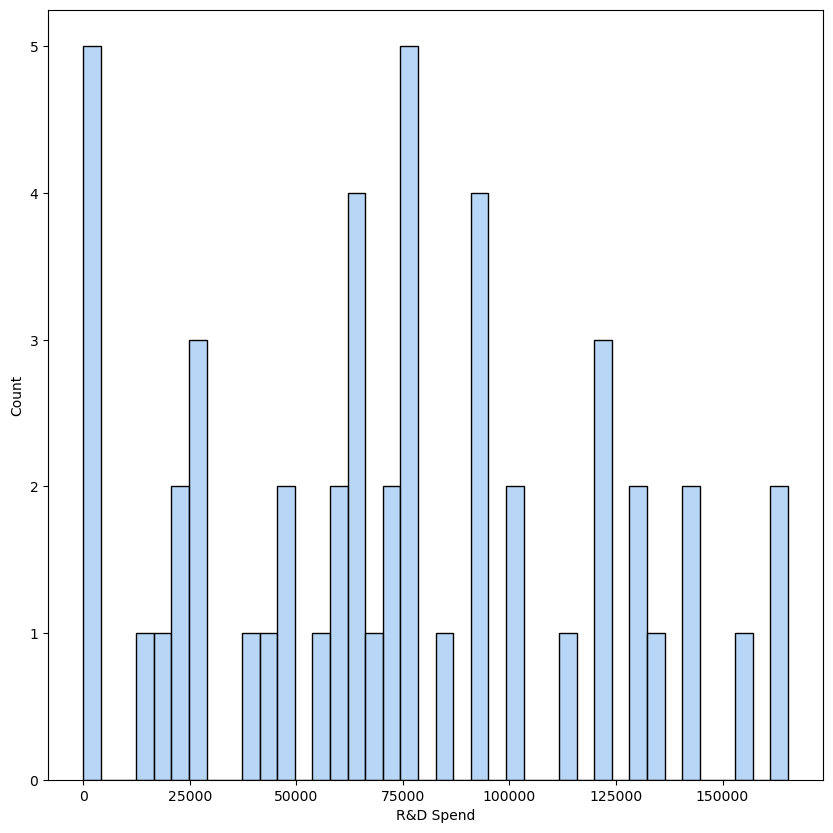

<Axes: xlabel='Administration', ylabel='Count'>

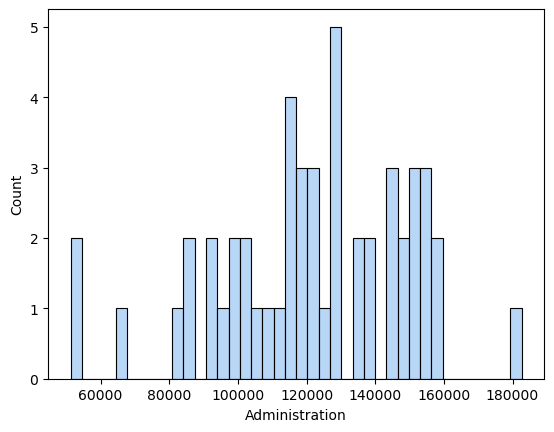

<Axes: xlabel='Marketing Spend', ylabel='Count'>

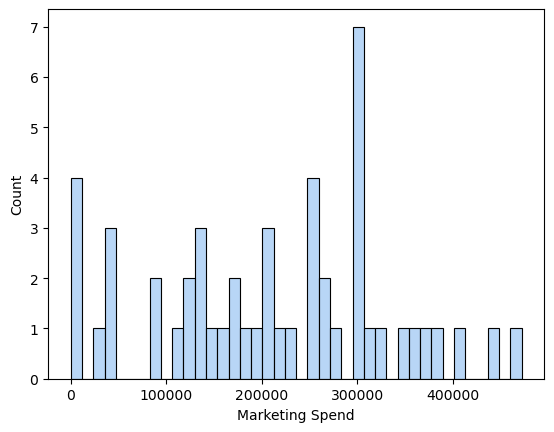

<Axes: xlabel='State', ylabel='Count'>

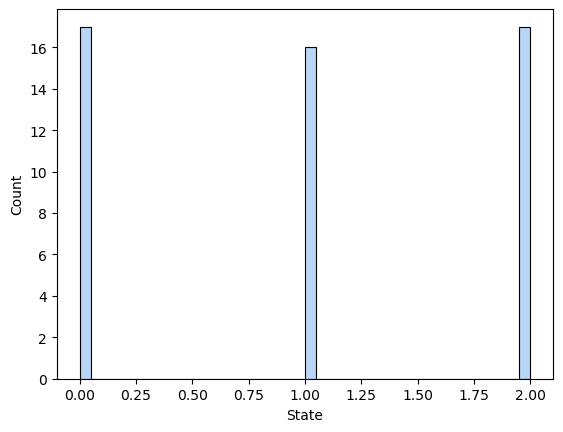

<Axes: xlabel='Profit', ylabel='Count'>

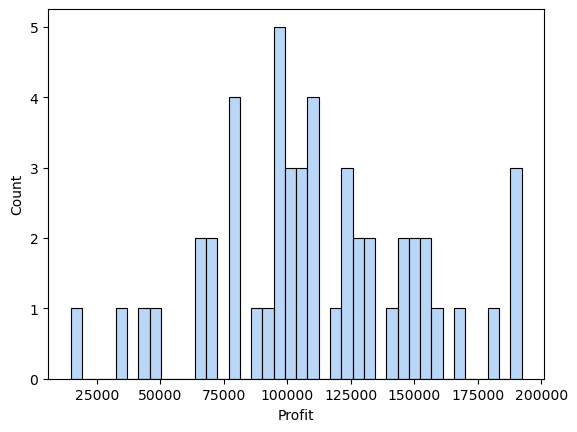

In [8]:
def Plots(df):
    sns.set_palette("pastel")
    plt.figure(figsize = (10, 10))
    for i in list(df.select_dtypes(np.number).columns):
        display(sns.histplot(x = i, data = df, bins = 40))
        plt.show()
        print(" ")
        
Plots(start_up)

In [9]:
def Statistics(df):
    for i in list(df.select_dtypes(np.number).columns):
        global mean, median, standard_deviation, kurtosis
        mean = np.mean(df[i])
        median = np.median(df[i])
        standard_deviation = np.std(df[i])
        kurtosis = df[i].kurt() + 3
        
        print('\n\nColumn -=-=-=-=> ', i)
        print('\n\nMean = {}\n\nMedian = {}\n\nStandard Deviation = {}\n\nKurtosis = {}'.format(mean, median, standard_deviation, kurtosis))
        
        if mean != median:
            if mean > median:
                print('\nRight Skewed')
            else:
                print('\nLeft Skewed')
                
        if kurtosis > 3:
            print('\nThe distribution is Leptokurtic')
        else:
            print('\nThe distribution is Platykurtic\n')
        print("-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")

Statistics(start_up)
            



Column -=-=-=-=>  R&D Spend


Mean = 73721.6156

Median = 73051.08

Standard Deviation = 45440.915562565344

Kurtosis = 2.2385354431575326

Right Skewed

The distribution is Platykurtic

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


Column -=-=-=-=>  Administration


Mean = 121344.63960000001

Median = 122699.795

Standard Deviation = 27736.20965129446

Kurtosis = 3.225071135368654

Left Skewed

The distribution is Leptokurtic
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


Column -=-=-=-=>  Marketing Spend


Mean = 211025.09780000002

Median = 212716.24

Standard Deviation = 121061.23118271727

Kurtosis = 2.3282988718702486

Left Skewed

The distribution is Platykurtic

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


Column -=-=-=-=>  State


Mean = 1.0

Median = 1.0

Standard Deviation = 0.8246211251235321

Kurtosis = 1.4361702127659575

The distribution is Platykurtic

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


Column -=-=-=-=>  Profit


Mean = 112012.63920000002

Median = 

<Axes: >

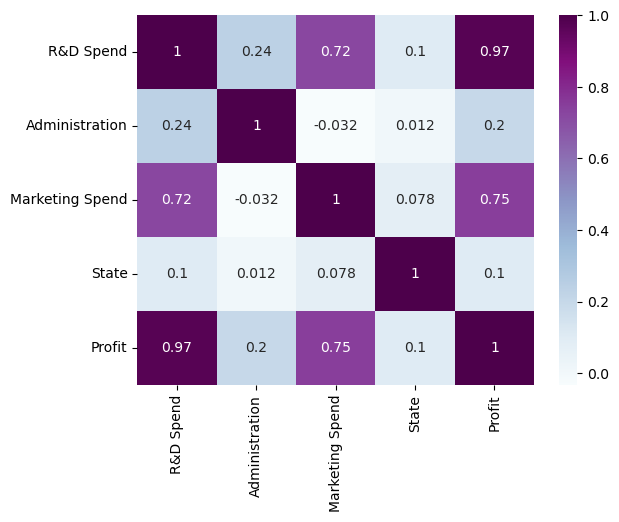

In [10]:
correlation = df.corr()
set_corr = set(correlation.values[(correlation > 0.5) | (correlation < -0.5)])
set_corr.remove(1.0)
sns.color_palette('pastel')
sns.heatmap(df.corr(), cmap = "BuPu", annot = True)

In [12]:
a = df.iloc[: , : - 1]
vif=pd.DataFrame()
vif['Variables'] = a.columns
vif['vif_values'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif.sort_values('vif_values', ascending = False)

,Variables,vif_values
0,R&D Spend,8.386322
2,Marketing Spend,7.674608
1,Administration,4.815916
3,State,2.382637


In [14]:
linear_regressor = LinearRegression(copy_X = True, fit_intercept = True)
linear_regressor.fit(Train_X, Train_Y)

LinearRegression()

In [41]:
Model = pd.DataFrame()
Model['Predicted_Values'] = linear_regressor.predict(Train_X)
Model['Actual_Values'] = Train_Y
Model['Error'] = Train_Y - Model['Predicted_Values']
Model['Absolute_Error'] = np.abs(Model.Error)
Model['Error_Pct'] = np.abs((Model['Error'] * 100) / Train_Y)
Model = Model.sort_values('Error_Pct', ascending = False)
Model

,Predicted_Values,Actual_Values,Error,Absolute_Error,Error_Pct
39,50167.786276,35673.41,-14494.376276,14494.376276,40.630756
13,50000.114790,64926.08,14925.965210,14925.965210,22.989167
2,60358.006229,49490.75,-10867.256229,10867.256229,21.958156
10,51782.242748,42559.73,-9222.512748,9222.512748,21.669575
25,77835.127372,90708.19,12873.062628,12873.062628,14.191731
23,70216.113937,81229.06,11012.946063,11012.946063,13.557889
20,61788.901267,69758.98,7970.078733,7970.078733,11.425165
19,147331.595268,132602.65,-14728.945268,14728.945268,11.107580
4,127908.587595,141585.52,13676.932405,13676.932405,9.659838
8,142373.065797,129917.04,-12456.025797,12456.025797,9.587677


In [42]:
coefficients = pd.DataFrame()
columns = list(df.columns)
columns.remove('Profit')
coefficients['Values'] = linear_regressor.coef_
coefficients['Columns'] = columns
coefficients

,Values,Columns
0,0.745957,R&D Spend
1,-0.007812,Administration
2,0.029543,Marketing Spend
3,-1336.290680,State


In [43]:
r2 = linear_regressor.score(Train_X, Train_Y)
p = Train_X.shape[1]
n = Train_X.shape[0]
adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
print("The coefficient of determinant is: {} and the adjusted value is {}".format(r2 * 100, adj_r2 * 100))

The coefficient of determinant is: 95.48331043918286 and the adjusted value is 94.96711734651804


In [44]:
print("The mean of the error is: ", np.mean(Model.Error))

The mean of the error is:  -8.913048077374697e-12


In [45]:
print("The mean of absolute error is: ", np.mean(Model.Absolute_Error))

The mean of absolute error is:  5496.825119708087


(array([ 3.,  2.,  1.,  6., 10.,  6.,  3.,  3.,  3.,  3.]),
 array([-14728.94526847, -11763.45422058,  -8797.96317269,  -5832.47212481,
         -2866.98107692,     98.50997096,   3064.00101885,   6029.49206673,
          8994.98311462,  11960.47416251,  14925.96521039]),
 <BarContainer object of 10 artists>)

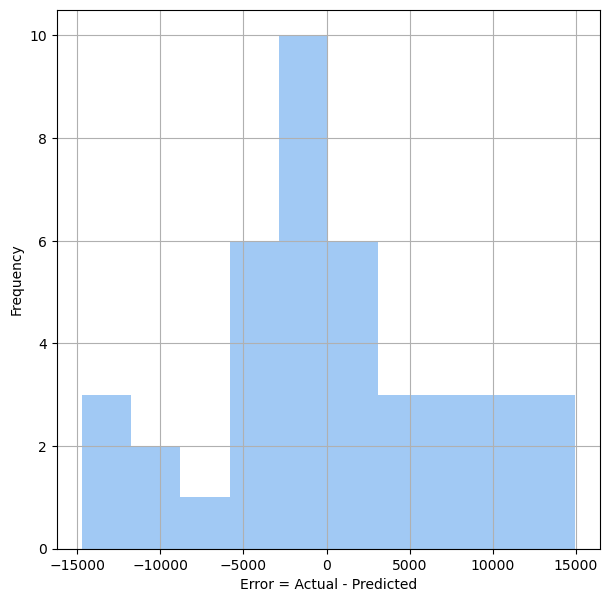

In [46]:
plt.figure(figsize = (7, 7))
plt.xlabel('Error = Actual - Predicted')
plt.ylabel('Frequency')
plt.grid()
plt.hist(x = Model.Error)

<Axes: xlabel='Actual_Values', ylabel='Predicted_Values'>

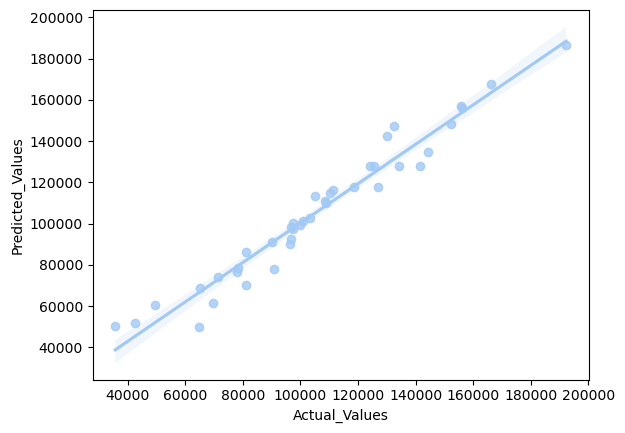

In [47]:
sns.regplot(x = Model.Actual_Values, y = Model.Predicted_Values, data = Model)

In [48]:
Predicted_Test = linear_regressor.predict(Test_X)
Error_Test = Test_Y - Predicted_Test
Error_Test_Percentage = abs(Error_Test) * 100 / Test_Y 
MSE = np.mean(np.square(Error_Test ))
print("The mean square value of error test is: ", MSE)
print("\nThe mean square value of error train is: ", np.mean(np.square(Model.Error)))

The mean square value of error test is:  222201532.1136772

The mean square value of error train is:  52117421.65796189


In [49]:
RMSE = np.sqrt(MSE)
print("The root mean square value of error test is: ", RMSE )
print("\nroot mean square value of error train is: ", np.sqrt(np.mean(np.square(Model.Error)))) 

The root mean square value of error test is:  14906.425866507276

root mean square value of error train is:  7219.2396869727145


In [51]:
MAPE = np.mean(Error_Test_Percentage)
print("The mean absolute percentage error (of test) is: ", MAPE)
print("\nThe mean absolute percentage error (of train) is: " , np.mean(Model.Error_Pct)) 

The mean absolute percentage error (of test) is:  30.806542020891207

The mean absolute percentage error (of train) is:  6.622510455491502


In [52]:
print("Accuracy on train data is: ", 100 - MAPE  )
print('\nAccuracy on test data is: ', 100 - np.mean(Model.Error_Pct))

Accuracy on train data is:  69.19345797910879

Accuracy on test data is:  93.37748954450849


In [53]:
def Quartiles(df, y, k):
    global Lower, Upper, Lower_Outliers, Upper_Outliers
    Lower = df[y].quantile(q = 0.25)
    Upper = df[y].quantile(q = 0.75)
    IQR = Upper - Lower
    Lower_Outliers =  Lower - k * IQR 
    Upper_Outliers =  Upper + k * IQR 
    df.drop(labels = list(df [df[y] >= Upper_Outliers].index), inplace = True)
    df.drop(labels = list(df[df[y] <= Lower_Outliers].index), inplace = True)
    df.reset_index(drop = True, inplace = True)
Quartiles(df, 'Profit', 0.75) ## K = 1 becasue the data is not vast

In [54]:
linear_regressor = LinearRegression(copy_X = True, fit_intercept = True)
linear_regressor.fit(Train_X, Train_Y)
Model = pd.DataFrame()
Model['Predicted_Values'] = linear_regressor.predict(Train_X)
Model['Actual_Values'] = Train_Y
Model['Error'] = Train_Y - Model['Predicted_Values']
Model['Absolute_Error'] = np.abs(Model.Error)
Model['Error_Pct'] = np.abs((Model['Error'] * 100) / Train_Y)
Model = Model.sort_values('Error_Pct', ascending = False)
Model

,Predicted_Values,Actual_Values,Error,Absolute_Error,Error_Pct
39,50167.786276,35673.41,-14494.376276,14494.376276,40.630756
13,50000.114790,64926.08,14925.965210,14925.965210,22.989167
2,60358.006229,49490.75,-10867.256229,10867.256229,21.958156
10,51782.242748,42559.73,-9222.512748,9222.512748,21.669575
25,77835.127372,90708.19,12873.062628,12873.062628,14.191731
23,70216.113937,81229.06,11012.946063,11012.946063,13.557889
20,61788.901267,69758.98,7970.078733,7970.078733,11.425165
19,147331.595268,132602.65,-14728.945268,14728.945268,11.107580
4,127908.587595,141585.52,13676.932405,13676.932405,9.659838
8,142373.065797,129917.04,-12456.025797,12456.025797,9.587677


In [55]:
r2 = linear_regressor.score(Train_X, Train_Y)
p = Train_X.shape[1]
n = Train_X.shape[0]
adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
print("The coefficient of determinant is: {} and the adjusted value is {}".format(r2 * 100, adj_r2 * 100))

The coefficient of determinant is: 95.48331043918286 and the adjusted value is 94.96711734651804


In [56]:
print("The mean of the error is: ", np.mean(Model.Error))
print("\nThe mean of absolute error is: ", np.mean(Model.Absolute_Error))

The mean of the error is:  -8.913048077374697e-12

The mean of absolute error is:  5496.825119708087


(array([ 3.,  2.,  1.,  6., 10.,  6.,  3.,  3.,  3.,  3.]),
 array([-14728.94526847, -11763.45422058,  -8797.96317269,  -5832.47212481,
         -2866.98107692,     98.50997096,   3064.00101885,   6029.49206673,
          8994.98311462,  11960.47416251,  14925.96521039]),
 <BarContainer object of 10 artists>)

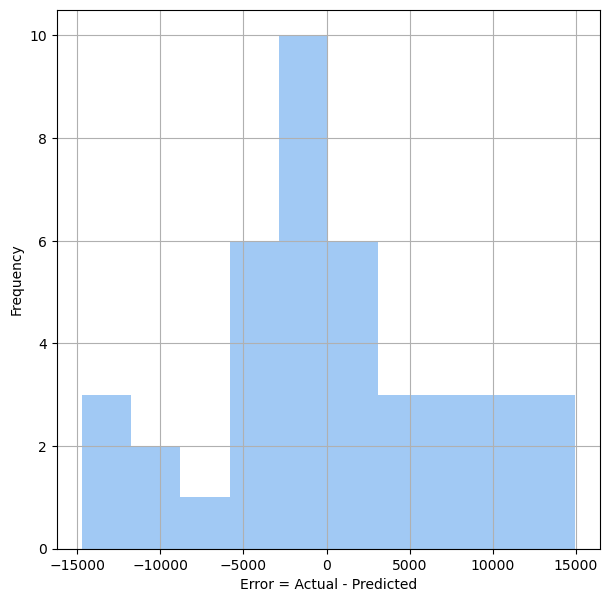

In [57]:
plt.figure(figsize = (7, 7))
plt.xlabel('Error = Actual - Predicted')
plt.ylabel('Frequency')
plt.grid()
plt.hist(x = Model.Error)

<Axes: xlabel='Actual_Values', ylabel='Predicted_Values'>

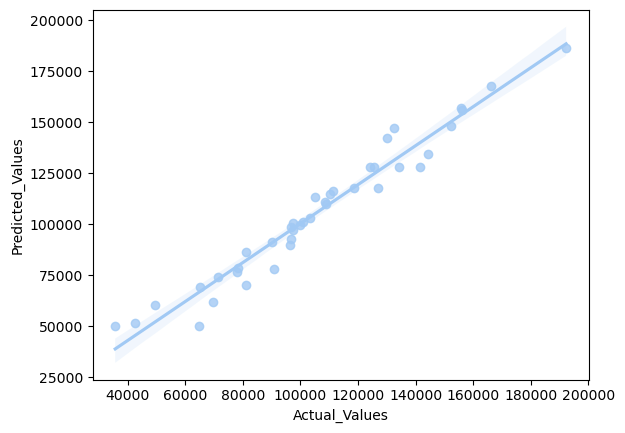

In [58]:
sns.regplot(x = Model.Actual_Values, y = Model.Predicted_Values, data = Model)

In [59]:
Predicted_Test = linear_regressor.predict(Test_X)
Error_Test = Test_Y - Predicted_Test
Error_Test_Percentage = abs(Error_Test) * 100 / Test_Y 

# MSE

MSE = np.mean(np.square(Error_Test ))
print("The mean square value of error test is: ", MSE)
print("\nThe mean square value of error train is: ", np.mean(np.square(Model.Error)))

# RMSE

RMSE = np.sqrt(MSE)
print("The root mean square value of error test is: ", RMSE )
print("\nroot mean square value of error train is: ", np.sqrt(np.mean(np.square(Model.Error))))

# MAPE

MAPE = np.mean(Error_Test_Percentage)
print("The mean absolute percentage error (of test) is: ", MAPE)
print("\nThe mean absolute percentage error (of train) is: " , np.mean(Model.Error_Pct)) 

# Accuracy

print("Accuracy on train data is: ", 100 - MAPE  )
print('\nAccuracy on test data is: ', 100 - np.mean(Model.Error_Pct))

The mean square value of error test is:  222201532.1136772

The mean square value of error train is:  52117421.65796189
The root mean square value of error test is:  14906.425866507276

root mean square value of error train is:  7219.2396869727145
The mean absolute percentage error (of test) is:  30.806542020891207

The mean absolute percentage error (of train) is:  6.622510455491502
Accuracy on train data is:  69.19345797910879

Accuracy on test data is:  93.37748954450849


In [60]:
from sklearn.linear_model import Lasso
L = Lasso()
L.fit(Train_X, Train_Y)
print('The lasso score is: ', L.score(Train_X, Train_Y) * 100)

The lasso score is:  95.4833103091507


In [62]:
Model = pd.DataFrame ( )
Model['Predicted_Values'] = L.predict(Train_X)
Model['Actual_Values'] = Train_Y
Model['Error'] = Train_Y - Model['Predicted_Values']
Model['Absolute_Error'] = np.abs(Model.Error)
Model['Error_Percentage'] = np.abs((Model['Error'] * 100) / Train_Y)
Model = Model.sort_values('Error_Percentage', ascending = False)
Model

,Predicted_Values,Actual_Values,Error,Absolute_Error,Error_Percentage
39,50169.568669,35673.41,-14496.158669,14496.158669,40.635753
13,50001.804743,64926.08,14924.275257,14924.275257,22.986565
2,60357.912705,49490.75,-10867.162705,10867.162705,21.957967
10,51780.920179,42559.73,-9221.190179,9221.190179,21.666468
25,77835.101671,90708.19,12873.088329,12873.088329,14.191760
23,70217.684813,81229.06,11011.375187,11011.375187,13.555955
20,61790.546608,69758.98,7968.433392,7968.433392,11.422807
19,147331.432622,132602.65,-14728.782622,14728.782622,11.107457
4,127908.480931,141585.52,13677.039069,13677.039069,9.659914
8,142374.443348,129917.04,-12457.403348,12457.403348,9.588737


In [63]:
print("The mean of the error is: ", np.mean(Model.Error))
print("\nThe mean of absolute error is: ", np.mean(Model.Absolute_Error))

The mean of the error is:  6.002665031701326e-12

The mean of absolute error is:  5496.783909669697


(array([ 3.,  2.,  1.,  6., 10.,  6.,  3.,  3.,  3.,  3.]),
 array([-14728.78262151, -11763.47683361,  -8798.17104572,  -5832.86525782,
         -2867.55946992,     97.74631797,   3063.05210587,   6028.35789377,
          8993.66368166,  11958.96946956,  14924.27525746]),
 <BarContainer object of 10 artists>)

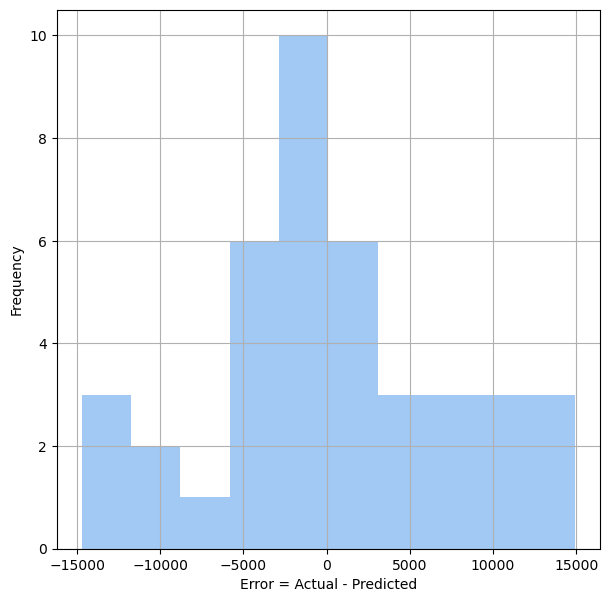

In [64]:
plt.figure(figsize = (7, 7))
plt.xlabel('Error = Actual - Predicted')
plt.ylabel('Frequency')
plt.grid()
plt.hist(x = Model.Error)

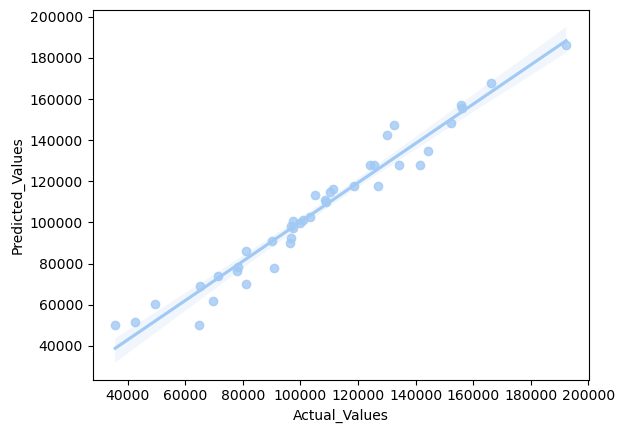

In [65]:
sns.regplot(x = Model.Actual_Values, y = Model.Predicted_Values, data = Model);

In [68]:
Predicted_Test = L.predict(Test_X)
Error_Test = Test_Y - Predicted_Test
Error_Test_Percentage = abs(Error_Test) * 100 / Test_Y 

# MSE

MSE = np.mean(np.square(Error_Test ))
print("The mean square value of error test is: ", MSE)
print("\nThe mean square value of error train is: ", np.mean(np.square(Model.Error)))

# RMSE

RMSE = np.sqrt(MSE)
print("The root mean square value of error test is: ", RMSE )
print("\nroot mean square value of error train is: ", np.sqrt(np.mean(np.square(Model.Error))))

# MAPE

MAPE = np.mean(Error_Test_Percentage)
print("The mean absolute percentage error (of test) is: ", MAPE)
print("\nThe mean absolute percentage error (of train) is: " , np.mean(Model.Error_Percentage)) 

# Accuracy

print("Accuracy on train data is: ", 100 - MAPE  )
print('\nAccuracy on test data is: ', 100 - np.mean(Model.Error_Percentage))

The mean square value of error test is:  222187836.5564023

The mean square value of error train is:  52117423.15838403
The root mean square value of error test is:  14905.966475086489

root mean square value of error train is:  7219.239790891007
The mean absolute percentage error (of test) is:  30.805653532381477

The mean absolute percentage error (of train) is:  6.622350853495469
Accuracy on train data is:  69.19434646761852

Accuracy on test data is:  93.37764914650452
